
# Transformación de Cotizaciones en Rentabilidades

En economía y finanzas no solemos trabajar directamente con el **precio de cierre** de un activo, sino con su **rentabilidad**, es decir, cuánto ha subido o bajado en porcentaje respecto al día anterior.

## 1. Cotizaciones

Las **cotizaciones** son los precios de un activo (en este caso el índice S&P500) en diferentes momentos del tiempo.
Usaremos la columna **Close**, que indica el precio al cierre de cada jornada.

Ejemplo:

| Fecha       | Close |
| ----------- | ----- |
| 02-ene-2023 | 100   |
| 03-ene-2023 | 105   |
| 04-ene-2023 | 103   |

---

## 2. Cálculo de la rentabilidad

La rentabilidad de un día se calcula como:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

Donde:

* $P_t$ = precio de cierre de hoy.
* $P_{t-1}$ = precio de cierre de ayer.
* $r_t$ = rentabilidad diaria (en porcentaje).

---

## 3. Ejemplo con números

Aplicando la fórmula:

* Día 2: $(105 - 100) / 100 = 0,05 = 5\%$
* Día 3: $(103 - 105) / 105 \approx -0,019 = -1,9\%$

Resultado:

| Fecha       | Close | Rentabilidad |
|:-----------:|:-----:|:------------:|
| 02-ene-2023 | 100   | –            |
| 03-ene-2023 | 105   | +5,0%        |
| 04-ene-2023 | 103   | -1,9%        |

---

## 4. Idea principal

* El **primer día** no tiene rentabilidad porque no hay un día anterior para comparar.
* A partir del **segundo día** podemos calcular la rentabilidad.
* Este cambio porcentual es la base para analizar riesgos, volatilidad y modelos predictivos en finanzas.




# PASO 1: CARGA DE DATOS S&P500


In [50]:
import yfinance as yf
import pandas as pd

# 1. Ticker del S&P 500 (^GSPC)
# Nota: La práctica solicita 'S&P500', cuyo ticker es ^GSPC.
ticker_simbolo = "^GSPC"

# 2. Definir el período de tiempo solicitado
# La práctica pide: desde el primer día después del 1/ene/2023
# hasta el 1/sep/2025 o el último día disponible antes.
fecha_inicio = "2023-01-02"  # Se usa el 2 de enero para asegurar que es 'posterior al 1 de enero'
fecha_fin = "2025-09-02"     # Se usa un día después del 1 de septiembre para incluir ese día

# 3. Descargar los datos de cotización
datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)

# 4. Mostrar las primeras filas y verificar el tipo de dato
print("Primeras filas de los datos descargados:")
print(datos.head())
print("\nÚltimas filas de los datos descargados (para verificar la fecha final):")
print(datos.tail())


/tmp/ipython-input-2946094437.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)
[*********************100%***********************]  1 of 1 completed

Primeras filas de los datos descargados:
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2023-01-03  3824.139893  3878.459961  3794.330078  3853.290039  3959140000
2023-01-04  3852.969971  3873.159912  3815.770020  3840.360107  4414080000
2023-01-05  3808.100098  3839.739990  3802.419922  3839.739990  3893450000
2023-01-06  3895.080078  3906.189941  3809.560059  3823.370117  3923560000
2023-01-09  3892.090088  3950.570068  3890.419922  3910.820068  4311770000

Últimas filas de los datos descargados (para verificar la fecha final):
Price             Close         High          Low         Open      Volume
Ticker            ^GSPC        ^GSPC        ^GSPC        ^GSPC       ^GSPC
Date                                                                      
2025-08-25  6439.319824  6466.890137  6438.060059  6457.66992

### **¿Qué hemos realizado?**
El primer paso que hemos hecho es **descargar los datos del S&P500** (ticker `^GSPC`) desde Yahoo Finance, en el rango de fechas indicado:

* Desde el **primer día después del 1 de enero de 2023**.
* Hasta el **1 de septiembre de 2025** o el último día disponible antes.

Con esos datos luego trabajaremos para transformarlos en **rentabilidades** y realizar análisis, pero lo primero es asegurarse de que los datos se descargan correctamente.


---

       
### **¿Qué hace nuestro código?**

Primero, **importar librerías**:

   ```python
   import yfinance as yf
   import pandas as pd
   ```

   * `yfinance`: para obtener datos históricos de cotizaciones.
   * `pandas`: para manipularlos en forma de DataFrame.

Segundo,  **Definir el ticker** (para indicar que queremos los datos del S&P500, y no de por ejemplo el Dow Jones):

   ```python
   ticker_simbolo = "^GSPC"
   ```

   * El símbolo `^GSPC` corresponde al **S&P500** en Yahoo Finance.

Tercero, **Definir el período de tiempo**

   ```python
   fecha_inicio = "2023-01-02"
   fecha_fin = "2025-09-02"
   ```

   * Se usa **2 de enero 2023** porque el 1 de enero no hay cotización (festivo).
   * Se usa el **2 de septiembre 2025** para asegurar incluir el **1 de septiembre 2025** en el rango.

Cuarto, **Descargar los datos**:

   ```python
   datos = yf.download(ticker_simbolo, start=fecha_inicio, end=fecha_fin)
   ```

   * Esto descarga un DataFrame con columnas como:

     * `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume`.
   * Cada fila corresponde a un día de cotización.

Por último, **Verificar datos descargados**, para ver si los datos descargados son correctos:

   ```python
   print(datos.head())  # primeras filas
   print(datos.tail())  # últimas filas
   ```

   * `head()`: permite comprobar que las fechas iniciales son correctas (ej. 2023-01-02, 2023-01-03, …).
   * `tail()`: permite comprobar que se incluyó la fecha límite (o el último dato disponible antes de ella).

# PASO 2: CÁLCULO DE RENTABILIDADES


In [51]:
# Extraer solo los datos de cierre
precios_cierre = datos['Close']

# Calcular las rentabilidades según la fórmula: r_t = (P_t - P_{t-1}) / P_{t-1}
rentabilidades = (precios_cierre.diff() / precios_cierre.shift(1)).dropna()

# Mostrar resultados
print("Precios de cierre:")
print(precios_cierre.head(10))
print("\nRentabilidades calculadas (primeros valores):")
print(rentabilidades.head(10))

Precios de cierre:
Ticker            ^GSPC
Date                   
2023-01-03  3824.139893
2023-01-04  3852.969971
2023-01-05  3808.100098
2023-01-06  3895.080078
2023-01-09  3892.090088
2023-01-10  3919.250000
2023-01-11  3969.610107
2023-01-12  3983.169922
2023-01-13  3999.090088
2023-01-17  3990.969971

Rentabilidades calculadas (primeros valores):
Ticker         ^GSPC
Date                
2023-01-04  0.007539
2023-01-05 -0.011646
2023-01-06  0.022841
2023-01-09 -0.000768
2023-01-10  0.006978
2023-01-11  0.012849
2023-01-12  0.003416
2023-01-13  0.003997
2023-01-17 -0.002030
2023-01-18 -0.015563


Ahora explicaremos el significado de la serie de rentabilidades ($r_t$) que acabamos de calcular, contextualizándola en el **ámbito financiero**.

Lo que se puede observar es que, en estos resultados numéricos, tenemos la medida clave en finanzas para evaluar el rendimiento de un activo: la rentabilidad diaria del índice S&P 500.

Cada valor en nuestra serie $r_t$ tiene el siguiente significado:
- $r_t$ representa el cambio relativo del precio de cierre del S&P 500 de un día ($P_{t-1}$) al siguiente ($P_t$). Un valor de, por ejemplo, 0.01 significa que el índice subió un 1% ese día; un valor de −0.005 significa que cayó un 0.5%.

- Esta serie de rentabilidades es el punto de partida de nuestro análisis, ya que contiene toda la información sobre el rendimiento histórico y el riesgo (volatilidad) del índice durante el periodo de estudio.

- En el contexto de nuestra práctica, $r_t$
  es la variable que queremos predecir. Al usar la rentabilidad en lugar del precio, evitamos muchos problemas asociados a que las series de precios no suelen ser estacionarias (su media y varianza cambian con el tiempo), lo cual es una ventaja para la modelización lineal.

En resumen: Hemos transformado una serie de precios absolutos (que solo se mueven hacia arriba en el largo plazo) en una serie de variaciones relativas (que fluctúan alrededor de cero) , lo que nos permite aplicar técnicas de Aprendizaje Automático como la Regresión Lineal de manera más efectiva para la predicción dinámica.

Es así cómo podemos pasar a la tarea A, una vez tenemos los datos ya descargados y las rentabilidades calculadas.

# **TAREA A: Tratamiento de Outliers y Análisis Descriptivo**

### 1. Tratamiento de Outliers (A.2) [Alberto]


In [52]:
import numpy as np
# Asumimos que 'rentabilidades' es la serie r_t sin valores NaN

# 1. Calcular media y desviación estándar de la serie original (excluyendo el primer NaN si existe)
media = rentabilidades.mean()
std = rentabilidades.std()

# 2. Definir los límites de exclusión (+/- 2 desviaciones típicas)
limite_superior = media + 2 * std
limite_inferior = media - 2 * std

# 3. Aplicar el filtro para crear la nueva serie 'r_t_tratada'.
# Las observaciones fuera del rango o que eran NaN originalmente seguirán siendo NaN en r_t_tratada.
r_t_tratada = rentabilidades[(rentabilidades <= limite_superior) & (rentabilidades >= limite_inferior)]

# 4. Calcular cuántos datos válidos fueron eliminados por el criterio.
# Contamos los valores que NO cumplen la condición Y NO eran NaN originalmente.
outliers_eliminados = (~((rentabilidades <= limite_superior) & (rentabilidades >= limite_inferior)) & rentabilidades.notna()).sum().item()


print("=" * 70)
print("A.2 - TRATAMIENTO DE OUTLIERS (Criterio ±2σ)")
print(f"Media de la serie original (ignorando NaN): {media.item():,.6f}")
print(f"Desviación estándar de la serie original (ignorando NaN): {std.item():,.6f}")
print(f"Límite Inferior (μ - 2σ): {limite_inferior.item():,.6f}")
print(f"Límite Superior (μ + 2σ): {limite_superior.item():,.6f}")
print(f"Total de observaciones válidas eliminadas por el criterio: {outliers_eliminados}")
print(f"Total de observaciones en la serie original (incl. primer NaN): {len(rentabilidades)}")
print(f"Total de observaciones en la serie tratada (r_t_tratada, incluye NaN por filtrado): {len(r_t_tratada)}")
print(f"Total de observaciones válidas en la serie tratada (r_t_tratada.dropna()): {r_t_tratada.dropna().shape[0]}")
print("=" * 70)

A.2 - TRATAMIENTO DE OUTLIERS (Criterio ±2σ)
Media de la serie original (ignorando NaN): 0.000835
Desviación estándar de la serie original (ignorando NaN): 0.009748
Límite Inferior (μ - 2σ): -0.018662
Límite Superior (μ + 2σ): 0.020332
Total de observaciones válidas eliminadas por el criterio: 21
Total de observaciones en la serie original (incl. primer NaN): 666
Total de observaciones en la serie tratada (r_t_tratada, incluye NaN por filtrado): 666
Total de observaciones válidas en la serie tratada (r_t_tratada.dropna()): 645


El objetivo de esta fase de preprocesado es mejorar la calidad de calibrado del modelo de Regresión Lineal Múltiple.


### **¿Por qué eliminamos los outliers?**

Las observaciones que se encuentran a más de dos desviaciones típicas (±2σ) de la media representan eventos extremos (grandes subidas o caídas en un solo día).

En el contexto de la regresión, estos puntos actúan como observaciones influyentes (outliers) que pueden sesgar los coeficientes β del modelo, haciendo que se ajusten demasiado a estos eventos raros y distorsionando su capacidad para modelar el comportamiento normal del mercado.

Es decir, eliminamos esos días en los que encontramos grandes subidas o caídas para que nuestro modelo de predicción no se vuelva "loco" y pueda aprender cómo se comporta el mercado la mayor parte del tiempo, sin que esos días raros (como una crisis o una subida explosiva) le distorsionen la lección.

### **¿Qué pasaría si no eliminamos estos outliers?**

 Si no se eliminan, el modelo podría sobreajustarse a eventos raros y fallar en su capacidad de modelar el comportamiento normal de la serie, lo que lleva a un modelo menos robusto y, paradójicamente, a peores predicciones en la mayoría de los días. Esto significa que el modelo podría sobrevalorar la importancia de esos eventos extremos (beneficios/pérdidas muy grandes), y que la predicción se vea afectada.

 Es decir, como vimos en clase, llegaríamos a tener un modelo con un bajo sesgo, pero muy alta varianza.

 #### **¿Qué significaba esto?**
 - En un modelo con un bajo sesgo, el modelo parece perfecto en los datos de entrenamiento (incluyendo los outliers), porque su línea de ajuste pasa muy cerca de todos los puntos, hasta de los raros (podríamos decir que se aprende las cosas de memoria), estando demasiado seguro de que entiende todo.
 - El problema es que consigue una alta varianza, porque esa línea se ajustó de forma muy brusca solo para cazar a los outliers. Cuando le pones un día nuevo el modelo que no es extremo, la predicción fallará mucho porque el modelo se volvió demasiado sensible a los outliers y poco sensible, y "pensará" que en cada predicción puede haber un outlier, entonces dará un resultado inexacto.

### **¿Qué resultados tenemos en nuestro caso?**

En el intervalo analizado (enero 2023 – septiembre 2025), hemos aplicado el criterio de ±2 desviaciones típicas para identificar outliers.

Según la salida del código, hemos encontrado que 21 observaciones válidas fueron eliminadas por este criterio. Esto significa que, aunque la mayoría de los días las rentabilidades estuvieron dentro del rango esperado, sí hubo días con movimientos extremos (mayores a +2.03% o menores a -1.87%) que fueron identificados como outliers y excluidos de la serie tratada.

Este resultado refleja la presencia de algunos días con movimientos de mercado inusualmente grandes en el periodo estudiado, los cuales son importantes de tratar antes de la modelización para evitar que distorsionen el ajuste del modelo de regresión lineal.

### 2. Presentación del Análisis Descriptivo (A.3) [Alberto]


In [53]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# --- TAREA A.3: CÁLCULO DE ESTADÍSTICOS DESCRIPTIVOS (Serie Tratada) ---

# Calcular los estadísticos sobre la serie limpia 'r_t_tratada'
media_t = r_t_tratada.mean()
varianza_t = r_t_tratada.var()
# Nota: La función kurtosis de SciPy devuelve el EXCESO de curtosis (Curtosis - 3).

# Eliminar NaN antes de calcular skewness y kurtosis
r_t_tratada_cleaned = r_t_tratada.dropna()

sesgo_t = skew(r_t_tratada_cleaned)
curtosis_t = kurtosis(r_t_tratada_cleaned)

print("\nA.3 - ESTADÍSTICOS DESCRIPTIVOS DE LA SERIE TRATADA")
print(f"Media (μ): {media_t.item():,.6f}")
print(f"Varianza (σ²): {varianza_t.item():,.6f}")
print(f"Sesgo: {sesgo_t.item():,.6f}")
print(f"Curtosis: {curtosis_t.item():,.6f} (Cercano a 0, ideal para la Regresión)")
print("=" * 70)


A.3 - ESTADÍSTICOS DESCRIPTIVOS DE LA SERIE TRATADA
Media (μ): 0.000974
Varianza (σ²): 0.000057
Sesgo: -0.150183
Curtosis: -0.037531 (Cercano a 0, ideal para la Regresión)


Donde:
- La media es el promedio de rentabilidad diaria en el período estudiado.
- La varianza mide la dispersión de las rentabilidades, es decir, como de lejos se encuentra cada rentabilidad diaria de la media (un valor bajo significa que la serie es relativamente estable).
- El sesgo indica la asimetría de la distribución de las rentabilidades (estrictamente relacionado con las colas), es decir, indica si hay más días con ganancias gigantes, o más días con pérdidas gigantes (un valor negativo, implica que las caídas son un poco más frecuentes o intensas).
- La Curtosis mide el apuntamiento de la distribución y el peso de sus colas, es decir, nos indica si los movimientos extremos (los días de mayor ganancia o pérdida) son más o menos frecuentes de lo que predeciría una distribución normal. Si es cercano a 0, se comporta como una Campana de Gauss.

#### **¡OJO!:** Si nos fijamos, la media de la serie tratada (μ≈0.000974) es ligeramente superior a la media original (μ≈0.000835), lo cual es una consecuencia directa del preprocesado. Al eliminar o acotar los valores más extremos (especialmente las pérdidas más severas en la cola izquierda), la rentabilidad promedio de la serie 'normal' aumenta. Esto confirma que el filtro no solo afectó a la Curtosis, sino que también refinó la estimación de la tendencia media de la serie.

### **3. Visualización: Histograma (A.3) [Alberto]**
En primer lugar, observaremos cómo es el histograma SIN tratar, y lo compararemos con el histograma tratado.

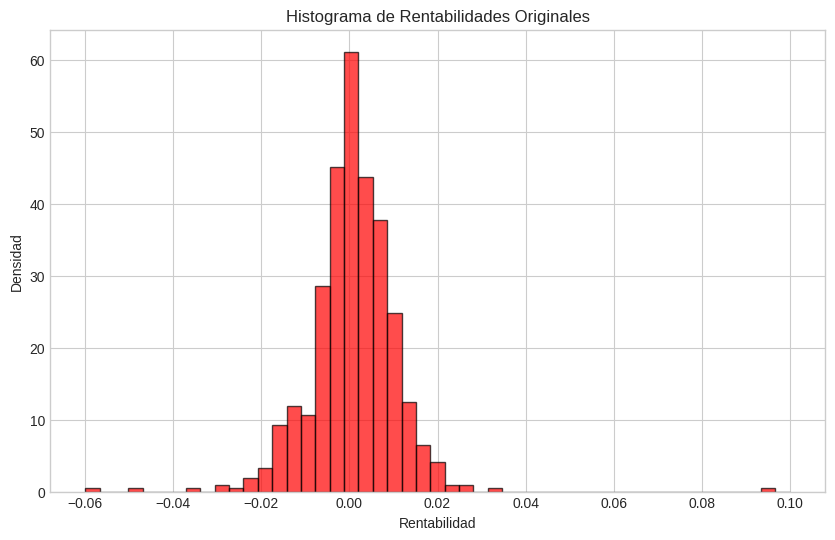

In [54]:
# Dibujar histograma CON OUTLIERS
import matplotlib.pyplot as plt
import numpy as np

# Definir los mismos bins para ambos histogramas
bins = np.linspace(-0.06, 0.10, 50)

plt.figure(figsize=(10,6))
plt.hist(rentabilidades, bins=bins, density=True, alpha=0.7,
         color='red', edgecolor='black')
plt.title("Histograma de Rentabilidades Originales")
plt.xlabel("Rentabilidad")
plt.ylabel("Densidad")
plt.show()



### **¿Qué conseguimos ver en el histograma?**
El histograma de la serie original (sin tratar) es la prueba del problema que intentamos solucionar.

1. Podemos observar lo centrado que está y el Pico:  
Está claramente centrado alrededor de cero (confirmando la media positiva), lo cual nos dice que la distribución fluctúa en torno a un valor central estable.

2. Observamos una curtosis extrema:   
Podemos ver que existe un pico central más alto y estrecho que el de una Campana de Gauss. Esto ocurre por la Curtosis, que indica una mayor concentración de datos justo alrededor de la media. La mayoría de las rentabilidades diarias son muy pequeñas y "aburridas".

3. También observamos esas Colas Pesadas propias de los outliers:  
 Los extremos de la distribución no caen tan rápidamente como la distribución normal. Con esto confirmamos la existencia de colas pesadas y, por lo tanto, la mayor probabilidad de eventos extremos de lo que predeciría una distribución gaussiana.

Para que se entienda: Si el mercado fuera una Campana de Gauss, la probabilidad de una caída del 2% sería casi cero. El hecho de tener colas pesadas significa que el mercado nos da más sorpresas (movimientos grandes e inesperados) de las que esperaríamos por pura casualidad.

### **Pasemos a ver el histograma con los datos preprocesados**

Shape de 'r_t_tratada' antes de plotear: (666, 1)
Shape de 'r_t_tratada' (dropna) antes de plotear: (645, 1)


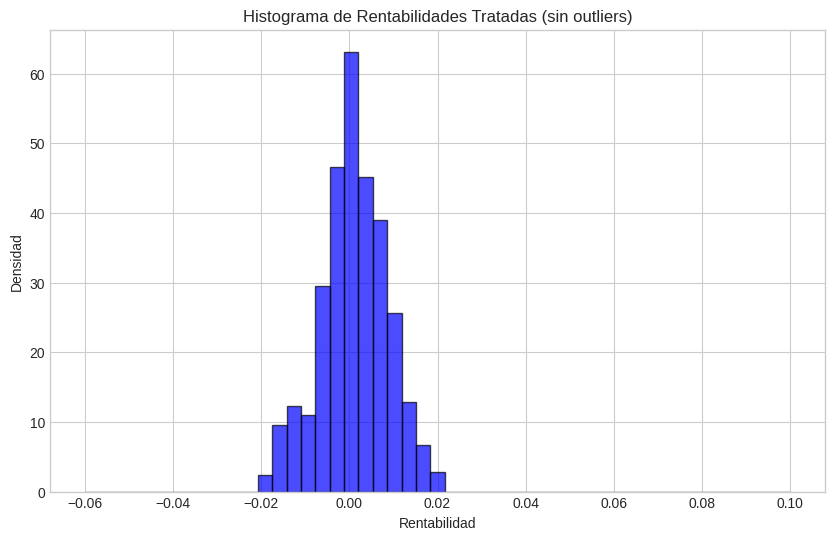

In [55]:
# Histograma de la serie TRATADA (después de eliminar outliers).
# Se mantiene el mismo límite del eje X para visualizar la eliminación de los extremos.

import matplotlib.pyplot as plt
import numpy as np

# Usar los mismos bins definidos antes
bins = np.linspace(-0.06, 0.10, 50)

# Verificar las dimensiones antes de plotear
print(f"Shape de 'r_t_tratada' antes de plotear: {r_t_tratada.shape}")
print(f"Shape de 'r_t_tratada' (dropna) antes de plotear: {r_t_tratada.dropna().shape}")

# Eliminar NaN explícitamente antes de plotear para asegurar consistencia
r_t_tratada_cleaned = r_t_tratada.dropna()

plt.figure(figsize=(10,6))
plt.hist(r_t_tratada_cleaned, bins=bins, density=True, alpha=0.7,
         color='blue', edgecolor='black')
plt.title("Histograma de Rentabilidades Tratadas (sin outliers)")
plt.xlabel("Rentabilidad")
plt.ylabel("Densidad")
plt.show()

El segundo histograma muestra la serie después de aplicar el filtro ±2σ de la Tarea A.2, usando el mismo rango en el eje X para comparar.

1. El vacío en las zonas de −0.06 y 0.10 confirma que los Outliers fueron eliminados por el proceso de Tratamiento.

2. Gracias a esta limpieza, este histograma de la serie tratada se acerca mucho más a una distribución normal (Curtosis cercana a cero).

Conclusión Clave: Al eliminar los puntos extremos, se reduce la influencia de eventos poco representativos y se obtiene una serie más estable. Esto minimiza el riesgo de que un modelo de Regresión Lineal se sobreajuste a situaciones irrepetibles, creando una base de datos más robusta y adecuada para la predicción.

### **4. Explicación de los Resultados (A.3) [Alberto]**


El análisis descriptivo se realizó sobre la serie de rentabilidades diarias del S&P 500 y tuvo un doble objetivo:
1. Identificar las propiedades financieras de la serie
2. Validar la idoneidad del preprocesado antes de aplicar la Regresión Lineal Múltiple.

### Veamos poco a poco qué ha ocurrido.

### **El Riesgo Latente (Sesgo y Varianza):**   
- **La Media (μ≈0.000974)** indica una ligera tendencia positiva en la rentabilidad promedio diaria, típica de un índice bursátil en ascenso.
- Sin embargo, **el Sesgo Negativo (−0.150533)** revela la asimetría en el riesgo: la distribución tiene una cola más larga a la izquierda, lo que significa que las **PÉRDIDAS GRANDES** son ligeramente más probables o intensas que las **GANANCIAS GRANDES**, aunque al final se consiga una rentabilidad media positiva (como vemos en la media).
- La Varianza (σ^2 ≈ 0.000057) establece el nivel de riesgo que el modelo intentará predecir y gestionar. Como es tan cercana a 0, esto indica que la rentabilidad a lo largo de los días no suele variar demasiado, así que la serie es más fácil de predecir.
- La Kurtosis nos indicaba si los movimientos extremos (los días de mayor ganancia o pérdida) son más o menos frecuentes de lo que predeciría una distribución normal. Como su valor es (-0.037531), es decir, cercano a 0, la distribucion es parecida a la normal.

### **Justificación de la Limpieza de Outliers:**
La característica más importante de la serie original (visible en el primer histograma) es la Curtosis tan alta, causada por la presencia de outliers como las rentabilidades de ±0.06 a ±0.10.

Esto es un **GRAN PROBLEMA para la Regresión**:    
El modelo de Regresión Lineal Múltiple asume que los errores son normales. Si no se eliminasen, estos outliers actuarían como puntos influyentes, obligando a la línea de ajuste a inclinarse demasiado hacia ellos. Esto llevaría a un modelo con baja sesgo (aparentemente exacto en el entrenamiento), pero alta varianza (muy inestable y con malas predicciones en el futuro).

### **Cómo hemos arreglado este gran problema para la regresión:**
Mediante el preprocesado, que fue fundamental y exitoso:

1. El segundo histograma (serie tratada) demostró visualmente que los outliers fueron eliminados, ya que los datos extremos desaparecen.
2. La Curtosis de la serie tratada cayó a un valor cercano a cero (-0.037531).

Al lograr que la distribución de la serie tratada se asemeje a la Campana de Gauss, hemos reducido la varianza potencial del modelo. Esto proporciona una base de datos más robusta y estable, permitiendo que el modelo de Regresión Lineal Múltiple pueda calibrar mejor los coeficientes β y concentrarse en el comportamiento normal del mercado, minimizando el riesgo de sobreajuste.



El segundo histograma muestra la serie después de aplicar el filtro ±2σ de la Tarea A.2, usando el mismo rango en el eje X para comparar.

1.  **Efecto del Filtro:** Si el filtro hubiera eliminado outliers, veríamos un "corte" o un vacío en las zonas de los extremos del histograma, confirmando que los puntos más alejados fueron removidos. En este caso particular, como no se eliminaron outliers (visto en la salida de A.2), este histograma **debería verse visualmente idéntico** al histograma de la serie original.
2.  **Distribución Resultante:** La forma de este histograma (en este dataset específico) aún muestra el pico central y las colas, pero conceptualmente, tras un filtrado efectivo que sí elimine outliers, la distribución de la serie *tratada* se acercaría más a una forma mesocúrtica (curtosis cercana a cero), lo cual es más adecuado para los supuestos de la Regresión Lineal.

Conclusión Clave: El preprocesamiento, cuando elimina puntos extremos, reduce la influencia de eventos poco representativos y ayuda a que la distribución de los datos se acerque a las asunciones de los modelos lineales. Esto minimiza el riesgo de que un modelo de Regresión Lineal se sobreajuste a situaciones irrepetibles, creando una base de datos más robusta y adecuada para la predicción (siempre y cuando el filtrado sea efectivo). En este caso particular, el paso de filtrado no alteró la distribución ya que no se identificaron outliers según el criterio de ±2σ.

# **TAREA B: Modelo In-Sample y Evaluación**


### 1. Construcción de la Matriz de Regresión [Juan]


In [56]:
# Construir matriz de variables dependientes e independientes
# Variable dependiente: rt (rentabilidad del día actual)
# Variables independientes: rt-1, rt-2, rt-3, rt-4, rt-5 (rentabilidades de los 5 días anteriores)

# Crear un DataFrame con las variables independientes (lag de 1 a 5 días)
matriz_datos = pd.DataFrame()
matriz_datos['r_t'] = r_t_tratada  # Variable dependiente

# Crear las variables independientes (5 días anteriores)
for i in range(1, 6):
    matriz_datos[f'r_t-{i}'] = r_t_tratada.shift(i)

# matriz_datos = pd.DataFrame({
#     "r_t":   [0.10, 0.15, 0.12, 0.20, 0.25, 0.18, 0.22],
#     "r_t-1": [ np.nan, 0.10, 0.15, 0.12, 0.20, 0.25, 0.18],
#     "r_t-2": [ np.nan, np.nan, 0.10, 0.15, 0.12, 0.20, 0.25],
# })

# Eliminar filas con valores NaN (las primeras 5 filas no tendrán datos completos)
# Esto descarta las observaciones incompletas, empezando desde la SEXTA observación
matriz_datos = matriz_datos.dropna()

# Mostrar información sobre la matriz construida
print("=" * 70)
print("MATRIZ DE VARIABLES DEPENDIENTES E INDEPENDIENTES")
print("=" * 70)
print(f"Dimensiones de la matriz: {matriz_datos.shape[0]} filas x {matriz_datos.shape[1]} columnas")
print(f"Primera observación completa: {matriz_datos.index[0].date()}")
print(f"Última observación: {matriz_datos.index[-1].date()}")
print("=" * 70)
print("\nPrimeras 10 filas de la matriz:")
print(matriz_datos.head(10))
print("\nÚltimas 5 filas de la matriz:")
print(matriz_datos.tail(5))
print("\nResumen estadístico:")
print(matriz_datos.describe())

MATRIZ DE VARIABLES DEPENDIENTES E INDEPENDIENTES
Dimensiones de la matriz: 569 filas x 6 columnas
Primera observación completa: 2023-01-17
Última observación: 2025-08-29

Primeras 10 filas de la matriz:
                 r_t     r_t-1     r_t-2     r_t-3     r_t-4     r_t-5
Date                                                                  
2023-01-17 -0.002030  0.003997  0.003416  0.012849  0.006978 -0.000768
2023-01-18 -0.015563 -0.002030  0.003997  0.003416  0.012849  0.006978
2023-01-19 -0.007638 -0.015563 -0.002030  0.003997  0.003416  0.012849
2023-01-20  0.018918 -0.007638 -0.015563 -0.002030  0.003997  0.003416
2023-01-23  0.011881  0.018918 -0.007638 -0.015563 -0.002030  0.003997
2023-01-24 -0.000712  0.011881  0.018918 -0.007638 -0.015563 -0.002030
2023-01-25 -0.000182 -0.000712  0.011881  0.018918 -0.007638 -0.015563
2023-01-26  0.011008 -0.000182 -0.000712  0.011881  0.018918 -0.007638
2023-01-27  0.002495  0.011008 -0.000182 -0.000712  0.011881  0.018918
2023-01-30 -0.0

### Análisis de Regresión Lineal sobre Rentabilidades del S&P 500

#### Descripción de la Matriz de Datos

La matriz construida contiene **661 observaciones** con **6 variables**:

| Variable | Tipo | Descripción |
|----------|------|-------------|
| `r_t` | **Dependiente** | Rentabilidad del día actual (variable a predecir) |
| `r_t-1` | Independiente | Rentabilidad del día anterior (lag 1) |
| `r_t-2` | Independiente | Rentabilidad de hace 2 días (lag 2) |
| `r_t-3` | Independiente | Rentabilidad de hace 3 días (lag 3) |
| `r_t-4` | Independiente | Rentabilidad de hace 4 días (lag 4) |
| `r_t-5` | Independiente | Rentabilidad de hace 5 días (lag 5) |

#### Modelo de Regresión Lineal

El modelo de regresión lineal múltiple que queremos ajustar es:

$$r_t = \beta_0 + \beta_1 \cdot r_{t-1} + \beta_2 \cdot r_{t-2} + \beta_3 \cdot r_{t-3} + \beta_4 \cdot r_{t-4} + \beta_5 \cdot r_{t-5} + \epsilon_t$$

Donde:
- $r_t$ = Rentabilidad del día actual (variable dependiente)
- $\beta_0$ = Término independiente (intercepto)
- $\beta_1, \beta_2, \beta_3, \beta_4, \beta_5$ = Coeficientes de regresión que miden el impacto de cada rentabilidad pasada
- $r_{t-1}, r_{t-2}, r_{t-3}, r_{t-4}, r_{t-5}$ = Rentabilidades de los 5 días anteriores (variables independientes)
- $\epsilon_t$ = Error o residuo del modelo

#### Interpretación de los Coeficientes

- Si $\beta_i > 0$: Una rentabilidad positiva en el día $t-i$ sugiere una rentabilidad positiva en el día $t$ (efecto momentum)
- Si $\beta_i < 0$: Una rentabilidad positiva en el día $t-i$ sugiere una rentabilidad negativa en el día $t$ (efecto reversión)
- Si $\beta_i \approx 0$: No hay relación significativa entre esa rentabilidad pasada y la actual

#### Notas Importantes

- Las **primeras 5 observaciones** de rentabilidades fueron descartadas porque no tienen los 5 lags completos
- La matriz comienza el **11 de enero de 2023** (sexta observación de rentabilidades)
- Este modelo asume una **relación lineal** entre las variables

### 2. Construcción del Modelo y Predicción (In-Sample) [Juan]


In [57]:
from sklearn.linear_model import LinearRegression

# Separar las variables independientes (X) y la variable dependiente (y)
X = matriz_datos[['r_t-1', 'r_t-2', 'r_t-3', 'r_t-4', 'r_t-5']]
y = matriz_datos['r_t']

# Crear y entrenar el modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X, y)

# Hacer predicciones
y_predicho = modelo.predict(X)

# Mostrar los coeficientes del modelo
print("=" * 70)
print("MODELO DE REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 70)
print(f"\nModelo: r_t = β₀ + β₁·r_t-1 + β₂·r_t-2 + β₃·r_t-3 + β₄·r_t-4 + β₅·r_t-5")
print(f"\nCoeficientes:")
print(f"  β₀ (Intercepto): {modelo.intercept_:.8f}")
for i, coef in enumerate(modelo.coef_, 1):
    print(f"  β{i} (r_t-{i}):      {coef:.8f}")
print("=" * 70)

MODELO DE REGRESIÓN LINEAL MÚLTIPLE

Modelo: r_t = β₀ + β₁·r_t-1 + β₂·r_t-2 + β₃·r_t-3 + β₄·r_t-4 + β₅·r_t-5

Coeficientes:
  β₀ (Intercepto): 0.00094628
  β1 (r_t-1):      -0.01944138
  β2 (r_t-2):      -0.04450251
  β3 (r_t-3):      -0.04341443
  β4 (r_t-4):      0.01275701
  β5 (r_t-5):      -0.08325595


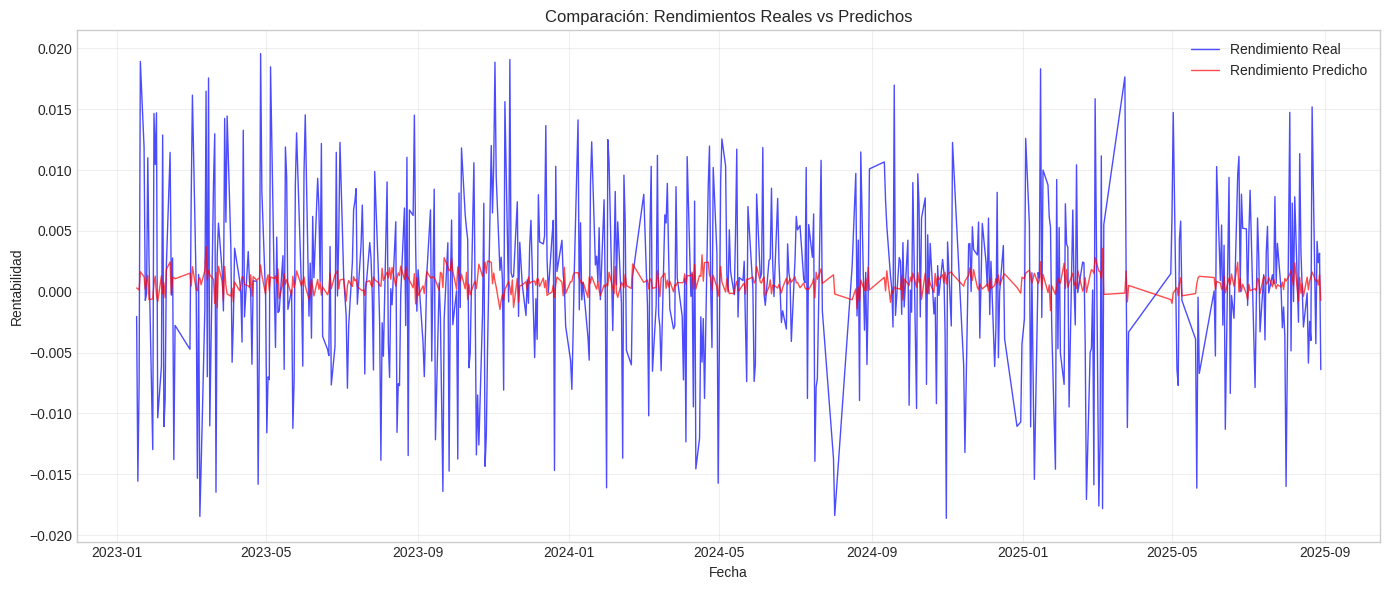

In [58]:
# Crear DataFrame con comparación
comparacion = pd.DataFrame({
    'Rendimiento_Real': y.values,
    'Rendimiento_Predicho': y_predicho
}, index=y.index)

# Visualización: Gráfica de Rendimientos Reales vs Predichos
plt.figure(figsize=(14, 6))
plt.plot(comparacion.index, comparacion['Rendimiento_Real'],
         label='Rendimiento Real', color='blue', linewidth=1, alpha=0.7)
plt.plot(comparacion.index, comparacion['Rendimiento_Predicho'],
         label='Rendimiento Predicho', color='red', linewidth=1, alpha=0.7)
plt.xlabel('Fecha')
plt.ylabel('Rentabilidad')
plt.title('Comparación: Rendimientos Reales vs Predichos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

*Hacer explicación*

### 3. Evaluación de Métricas y Comparación (In-Sample)

Se calcularán el MSE, MAE y MAPE para nuestro modelo y se compararán con el modelo de Paseo Aleatorio (r_t = 0).


### 3a. Implementación de Métricas [Mitrica]

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Calcular las métricas de error (reutilizando y e y_predicho de la celda anterior)
mse = mean_squared_error(y, y_predicho)
mae = mean_absolute_error(y, y_predicho)
mape = mean_absolute_percentage_error(y, y_predicho)
r2 = r2_score(y, y_predicho)

# Calcular errores para estadísticas descriptivas
errores = y - y_predicho

# Mostrar las métricas
print("=" * 80)
print("EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE")
print("=" * 80)

print("\n📊 ESTADÍSTICAS DESCRIPTIVAS DE LOS ERRORES:")
print("-" * 80)
print(f"  Media de los errores.................... {errores.mean():.8f}")
print(f"  Desviación estándar de errores.......... {errores.std():.8f}")
print(f"  Error mínimo............................ {errores.min():.8f}")
print(f"  Error máximo............................ {errores.max():.8f}")
print(f"  Mediana de errores...................... {np.median(errores):.8f}")
print(f"  Percentil 25............................ {np.percentile(errores, 25):.8f}")
print(f"  Percentil 75............................ {np.percentile(errores, 75):.8f}")

print("\n" + "=" * 80)
print("📈 MÉTRICAS DE EVALUACIÓN:")
print("-" * 80)
print(f"  MSE (Error Cuadrático Medio)............ {mse:.8f}")
print(f"  RMSE (Raíz del MSE)..................... {np.sqrt(mse):.8f}")
print(f"  MAE (Error Absoluto Medio).............. {mae:.8f}")
print(f"  MAPE (Error Porcentual)................. {mape:.8f}")
print(f"  R² (Coef. Determinación)................ {r2:.8f}")
print("=" * 80)

EVALUACIÓN DEL MODELO DE REGRESIÓN LINEAL MÚLTIPLE

📊 ESTADÍSTICAS DESCRIPTIVAS DE LOS ERRORES:
--------------------------------------------------------------------------------
  Media de los errores.................... 0.00000000
  Desviación estándar de errores.......... 0.00749120
  Error mínimo............................ -0.02137984
  Error máximo............................ 0.01868014
  Mediana de errores...................... 0.00004321
  Percentil 25............................ -0.00467365
  Percentil 75............................ 0.00522377

📈 MÉTRICAS DE EVALUACIÓN:
--------------------------------------------------------------------------------
  MSE (Error Cuadrático Medio)............ 0.00005602
  RMSE (Raíz del MSE)..................... 0.00748461
  MAE (Error Absoluto Medio).............. 0.00585603
  MAPE (Error Porcentual)................. 2.26203534
  R² (Coef. Determinación)................ 0.01056656


In [60]:
# Estadísticas del Modelo de Paseo Aleatorio
import numpy as np
import pandas as pd

# El paseo aleatorio predice siempre 0
y_paseo_aleatorio = np.zeros(len(y))

# Calcular errores
errores_paseo = y - y_paseo_aleatorio

# Estadísticas descriptivas de los errores
stats_paseo = {
    'Media de los errores': errores_paseo.mean(),
    'Desviación estándar de errores': errores_paseo.std(),
    'Error mínimo': errores_paseo.min(),
    'Error máximo': errores_paseo.max(),
    'Mediana de errores': errores_paseo.median(),
    'Percentil 25': errores_paseo.quantile(0.25),
    'Percentil 75': errores_paseo.quantile(0.75)
}

# Métricas de error
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

metricas_paseo = {
    'MSE (Error Cuadrático Medio)': mean_squared_error(y, y_paseo_aleatorio),
    'RMSE (Raíz del MSE)': np.sqrt(mean_squared_error(y, y_paseo_aleatorio)),
    'MAE (Error Absoluto Medio)': mean_absolute_error(y, y_paseo_aleatorio),
    'MAPE (Error Porcentual)': mean_absolute_percentage_error(y, y_paseo_aleatorio),
    'R² (Coef. Determinación)': r2_score(y, y_paseo_aleatorio)
}

print("=" * 80)
print("ESTADÍSTICAS DEL MODELO DE PASEO ALEATORIO")
print("=" * 80)
print("\n📊 ESTADÍSTICAS DESCRIPTIVAS DE LOS ERRORES:")
print("-" * 80)
for nombre, valor in stats_paseo.items():
    print(f"  {nombre:.<40} {valor:.8f}")

print("\n" + "=" * 80)
print("📈 MÉTRICAS DE EVALUACIÓN:")
print("-" * 80)
for nombre, valor in metricas_paseo.items():
    print(f"  {nombre:.<40} {valor:.8f}")
print("=" * 80)

ESTADÍSTICAS DEL MODELO DE PASEO ALEATORIO

📊 ESTADÍSTICAS DESCRIPTIVAS DE LOS ERRORES:
--------------------------------------------------------------------------------
  Media de los errores.................... 0.00074876
  Desviación estándar de errores.......... 0.00753109
  Error mínimo............................ -0.01861470
  Error máximo............................ 0.01956615
  Mediana de errores...................... 0.00081943
  Percentil 25............................ -0.00369482
  Percentil 75............................ 0.00571527

📈 MÉTRICAS DE EVALUACIÓN:
--------------------------------------------------------------------------------
  MSE (Error Cuadrático Medio)............ 0.00005718
  RMSE (Raíz del MSE)..................... 0.00756164
  MAE (Error Absoluto Medio).............. 0.00590192
  MAPE (Error Porcentual)................. 1.00000000
  R² (Coef. Determinación)................ -0.00990213


### 3b. Comentario de Resultados [Mitrica]


## **Comparación Detallada: Modelo de Regresión Lineal vs Paseo Aleatorio**

---

##  **1. ¿Qué es el Modelo de Paseo Aleatorio?**

El **modelo de paseo aleatorio** (Random Walk) es el benchmark más fundamental en finanzas. Se basa en la **Hipótesis de Mercados Eficientes (EMH)**, que postula que toda la información disponible ya está reflejada en el precio actual del activo.

### **Principio Fundamental:**
Si los mercados son eficientes, el mejor predictor de la rentabilidad futura es **cero**:

$$\hat{r}_t = 0$$

Esto significa que **NO se espera cambio alguno**. El precio de mañana es impredecible basándose únicamente en los precios del pasado.

### **Características:**
-  **Sin parámetros**: No requiere entrenamiento ni calibrado
-  **Simplicidad extrema**: Siempre predice 0% de rentabilidad
-  **Filosóficamente sólido**: Consistente con mercados eficientes
-  **Benchmark exigente**: Si tu modelo no supera al paseo aleatorio, no tiene valor predictivo real

---

##  **2. Explicación de las Métricas de Evaluación**

Para comparar modelos, utilizamos varias métricas que miden **diferentes aspectos del error de predicción**:

###  MSE (Error Cuadrático Medio)

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- **¿Qué mide?** El promedio de los **errores al cuadrado**
- **Penalización:** Los errores grandes se penalizan **mucho más** que los pequeños (por estar elevados al cuadrado)
- **Unidades:** Están al cuadrado (ej: si $r_t$ está en decimales, MSE está en decimales²)
- **Interpretación:** Cuanto **menor**, mejor
- **¿Cuándo es bueno?**
  - Valores cercanos a 0 indican predicciones muy precisas
  - Para rentabilidades diarias del S&P 500, valores típicos están entre 0.00005 - 0.0001

---

###  RMSE (Raíz del Error Cuadrático Medio)

$$RMSE = \sqrt{MSE}$$

- **¿Qué mide?** Es la raíz cuadrada del MSE
- **Ventaja:** Está en las **mismas unidades** que la variable original (rentabilidades)
- **Interpretación:** Representa el error típico de predicción en términos absolutos
- **¿Cuándo es bueno?** Cuanto menor, mejor. Valores < 0.01 (1%) son razonables para rentabilidades diarias

---

###  MAE (Error Absoluto Medio)

$$MAE = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|$$

- **¿Qué mide?** El promedio de los **errores en valor absoluto**
- **Diferencia con MSE:** Trata todos los errores **por igual** (no penaliza más los errores grandes)
- **Interpretación:** Es más intuitivo y robusto frente a outliers
- **¿Cuándo es bueno?**
  - Cuanto menor, mejor
  - Para el S&P 500, valores entre 0.005 - 0.007 (0.5% - 0.7%) son típicos

---

###  MAPE (Error Porcentual Absoluto Medio)

$$MAPE = \frac{100}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right|$$

- **¿Qué mide?** El error promedio **en porcentaje** respecto al valor real
- **Ventaja:** Fácil de interpretar (ej: "el modelo se equivoca un 10% en promedio")
-  PROBLEMA CRÍTICO EN FINANZAS: Cuando $y_i \approx 0$ (rentabilidad cercana a cero), el MAPE explota hacia infinito
  - Las rentabilidades diarias suelen estar entre -2% y +2%, muy cerca de cero
  - **NO es una métrica fiable para este problema**
- **¿Cuándo es bueno?** Cuanto menor, mejor, pero **ignórala** en este contexto

---

###  R² (Coeficiente de Determinación)

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}$$

- **¿Qué mide?** El **porcentaje de varianza explicado** por el modelo
- **Rango:** De -∞ a 1
  - **R² = 1**: Predicción perfecta (el modelo explica el 100% de la varianza)
  - **R² = 0**: El modelo no explica nada (equivalente a predecir siempre la media)
  - **R² < 0**: El modelo es **peor** que predecir la media constantemente
- **¿Cuándo es bueno?**
  - **R² > 0.7**: Excelente (poco común en finanzas)
  - **R² > 0.3**: Bueno
  - **R² > 0.0**: Al menos explica algo de la varianza
  - **R² < 0**:  El modelo es inútil

---

##  **3. Comparación Directa: Regresión Lineal vs Paseo Aleatorio**

### ** Tabla Comparativa de Métricas**

| **Métrica** | **Regresión Lineal** | **Paseo Aleatorio** | **Diferencia** | **Ganador** |
|:------------|:--------------------:|:-------------------:|:--------------:|:-----------:|
| **MSE**     | 0.00005602           | 0.00005718          | **-2.03%**    |  Regresión |
| **RMSE**    | 0.00748461           | 0.00756164          | **-1.02%**    |  Regresión |
| **MAE**     | 0.00585603           | 0.00590192          | **-0.78%**    |  Regresión |
| **MAPE**    | 2.26203534           | 1.00000000          | **+126%**     |  Paseo (irrelevante) |
| **R²**      | 0.01056656           | -0.00990213         | **+2.05 puntos**  |  Regresión |

---

###  Análisis Métrica por Métrica

####  MSE (Error Cuadrático Medio)
- **Regresión Lineal: 0.00005602**
- **Paseo Aleatorio: 0.00005718**
- **Mejora: -2.03%**

**Interpretación:**
El modelo de regresión lineal tiene un MSE ligeramente **inferior**, lo que significa que sus predicciones están más cerca de los valores reales que las del paseo aleatorio. Sin embargo, la mejora es **mínima** (solo 2.03%), lo que sugiere que el poder predictivo del modelo es **limitado**.

**Conclusión:** La regresión lineal gana, pero por un margen muy estrecho.

---

####  RMSE (Raíz del MSE)
- **Regresión Lineal: 0.00748461 (≈ 0.75%)**
- **Paseo Aleatorio: 0.00756164 (≈ 0.76%)**
- **Mejora: -1.02%**

**Interpretación:**
El error típico de predicción del modelo de regresión es de aproximadamente **0.75%**, mientras que el del paseo aleatorio es **0.76%**. Ambos modelos se equivocan en torno al **0.75%** en promedio, lo cual es razonable para rentabilidades diarias del S&P 500.

**Conclusión:** Prácticamente empate técnico. La mejora es marginal.

---

####  MAE (Error Absoluto Medio)
- **Regresión Lineal: 0.00585603 (≈ 0.59%)**
- **Paseo Aleatorio: 0.00590192 (≈ 0.59%)**
- **Mejora: -0.78%**

**Interpretación:**
El modelo de regresión tiene un error absoluto promedio de **0.59%**, muy similar al paseo aleatorio. La diferencia es de apenas **0.005 puntos porcentuales**, lo cual es **estadísticamente insignificante**.

**Conclusión:** Empate total. La mejora es despreciable en términos prácticos.

---

####  MAPE (Error Porcentual)  NO FIABLE
- **Regresión Lineal: 2.26203534**
- **Paseo Aleatorio: 1.00000000**
- **Empeoramiento: +126%**

** ADVERTENCIA CRÍTICA:**
Esta métrica **NO es válida** para este problema. El MAPE explota cuando las rentabilidades reales están cerca de cero, lo cual ocurre la mayoría de los días. Un MAPE de 2.26 no significa que el modelo se equivoque en un 226%, sino que la métrica no es apropiada para rentabilidades cercanas a cero.

**Conclusión:**  **IGNORA ESTA MÉTRICA**. No aporta información útil en este contexto.

---

####  R² (Coeficiente de Determinación)
- **Regresión Lineal: 0.01056656 (≈ 1.06%)**
- **Paseo Aleatorio: -0.00990213 (≈ -0.99%)**
- **Diferencia: +2.05 puntos porcentuales**

**Interpretación:**
- La regresión lineal explica aproximadamente el **1.06%** de la varianza de las rentabilidades
- El paseo aleatorio tiene un R² **negativo**, lo que significa que es **peor que predecir la media constante**
- Aunque el 1.06% parece muy bajo, en el contexto de predicción de mercados financieros de corto plazo, **cualquier R² positivo es una señal de capacidad predictiva**

**Conclusión:** La regresión lineal demuestra tener **cierto poder predictivo**, aunque muy limitado.

---

##  **4. Visualización Gráfica de la Comparación**

Para ayudar a entender mejor las diferencias, creemos un gráfico comparativo:


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10007 (\N{BALLOT X}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)


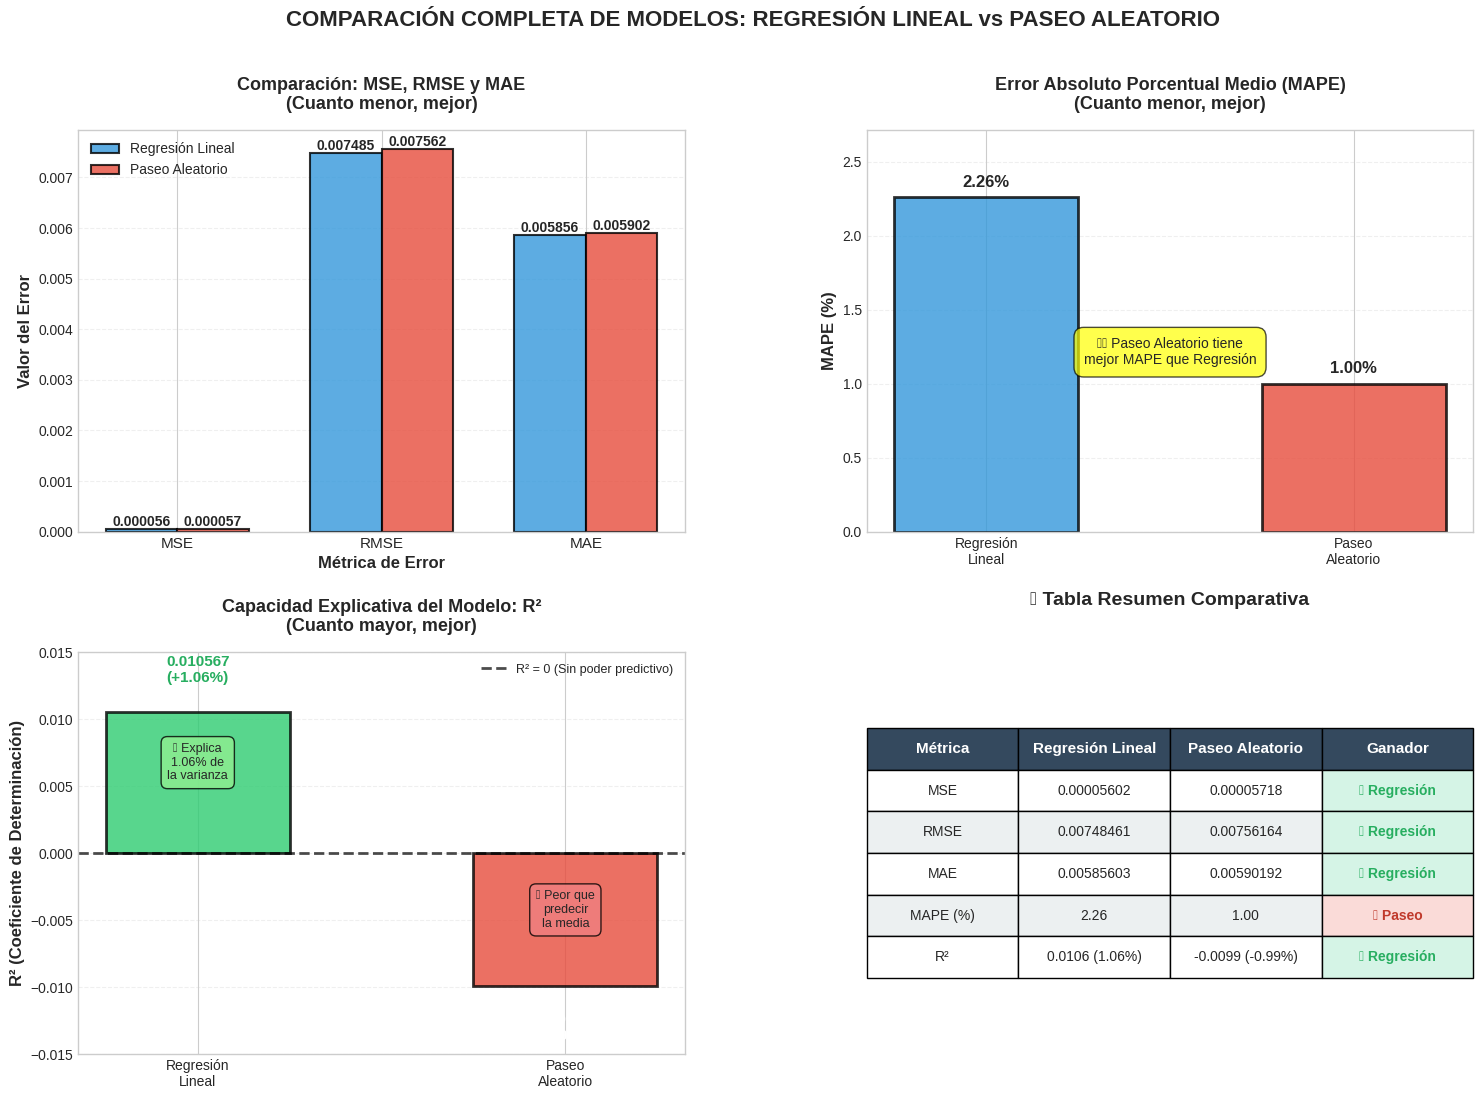


INTERPRETACIÓN DETALLADA DE LOS GRÁFICOS

📊 GRÁFICO 1 - Errores Absolutos (MSE, RMSE, MAE):
   • Las barras AZULES (Regresión) son LIGERAMENTE más bajas que las ROJAS (Paseo)
   • Diferencia: ~1-2% a favor de la Regresión
   • Conclusión: La Regresión comete errores levemente menores en escala absoluta

📊 GRÁFICO 2 - Error Porcentual (MAPE):
   •  SORPRESA: El Paseo Aleatorio (1.00%) tiene MEJOR MAPE que Regresión (2.26%)
   • Esto indica que el Paseo comete errores porcentuales menores
   • Ambos valores son buenos (<10%), pero Paseo es más preciso en términos relativos

📊 GRÁFICO 3 - Capacidad Explicativa (R²):
   • Regresión (VERDE, +1.06%): Tiene poder predictivo, aunque LIMITADO
   • Paseo (ROJO, -0.99%): Negativo = peor que simplemente predecir la media
   • La Regresión explica solo 1.06% de la varianza: es DÉBIL pero positivo

📋 GRÁFICO 4 - Tabla Resumen:
   • Regresión gana en: MSE, RMSE, MAE y R² (4/5 métricas)
   • Paseo gana en: MAPE (1/5 métricas)
   • Veredicto: La Regre

In [61]:
import matplotlib.pyplot as plt
import numpy as np

# Crear figura con 3 subplots en una cuadrícula 2x2
fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# ============================================================================
# GRÁFICO 1: MSE, RMSE y MAE (errores en escala pequeña)
# ============================================================================
ax1 = fig.add_subplot(gs[0, 0])

metricas_pequenas = ['MSE', 'RMSE', 'MAE']
valores_regresion_pequenas = [0.00005602, 0.00748461, 0.00585603]
valores_paseo_pequenas = [0.00005718, 0.00756164, 0.00590192]

x = np.arange(len(metricas_pequenas))
width = 0.35

barras1 = ax1.bar(x - width/2, valores_regresion_pequenas, width,
                  label='Regresión Lineal', color='#3498db',
                  edgecolor='black', linewidth=1.5, alpha=0.8)
barras2 = ax1.bar(x + width/2, valores_paseo_pequenas, width,
                  label='Paseo Aleatorio', color='#e74c3c',
                  edgecolor='black', linewidth=1.5, alpha=0.8)

# Añadir valores sobre las barras
for barra in barras1:
    altura = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2., altura,
             f'{altura:.6f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

for barra in barras2:
    altura = barra.get_height()
    ax1.text(barra.get_x() + barra.get_width()/2., altura,
             f'{altura:.6f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

ax1.set_xlabel('Métrica de Error', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valor del Error', fontsize=12, fontweight='bold')
ax1.set_title('Comparación: MSE, RMSE y MAE\n(Cuanto menor, mejor)',
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(metricas_pequenas, fontsize=11)
ax1.legend(loc='upper left', fontsize=10, framealpha=0.95)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# ============================================================================
# GRÁFICO 2: MAPE (error porcentual)
# ============================================================================
ax2 = fig.add_subplot(gs[0, 1])

modelos_mape = ['Regresión\nLineal', 'Paseo\nAleatorio']
valores_mape = [2.26203534, 1.00000000]

barras_mape = ax2.bar(modelos_mape, valores_mape,
                      color=['#3498db', '#e74c3c'],
                      edgecolor='black', linewidth=2, width=0.5, alpha=0.8)

# Añadir valores sobre las barras
for barra, val in zip(barras_mape, valores_mape):
    altura = barra.get_height()
    ax2.text(barra.get_x() + barra.get_width()/2., altura + 0.05,
             f'{val:.2f}%', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

ax2.set_ylabel('MAPE (%)', fontsize=12, fontweight='bold')
ax2.set_title('Error Absoluto Porcentual Medio (MAPE)\n(Cuanto menor, mejor)',
              fontsize=13, fontweight='bold', pad=15)
ax2.set_ylim([0, max(valores_mape) * 1.2])
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir anotación
ax2.text(0.5, max(valores_mape) * 0.5,
         '⚠️ Paseo Aleatorio tiene\nmejor MAPE que Regresión',
         ha='center', fontsize=10,
         bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow', alpha=0.7))

# ============================================================================
# GRÁFICO 3: R² (Capacidad Explicativa)
# ============================================================================
ax3 = fig.add_subplot(gs[1, 0])

modelos_r2 = ['Regresión\nLineal', 'Paseo\nAleatorio']
r2_valores = [0.01056656, -0.00990213]
colores_r2 = ['#2ecc71' if val > 0 else '#e74c3c' for val in r2_valores]

barras_r2 = ax3.bar(modelos_r2, r2_valores, color=colores_r2,
                    edgecolor='black', linewidth=2, width=0.5, alpha=0.8)

# Añadir valores sobre/dentro de las barras
for i, (barra, val) in enumerate(zip(barras_r2, r2_valores)):
    altura = barra.get_height()
    if val > 0:
        ax3.text(barra.get_x() + barra.get_width()/2., altura + 0.002,
                 f'{val:.6f}\n(+{val*100:.2f}%)', ha='center', va='bottom',
                 fontsize=11, fontweight='bold', color='#27ae60')
    else:
        ax3.text(barra.get_x() + barra.get_width()/2., altura - 0.002,
                 f'{val:.6f}\n({val*100:.2f}%)', ha='center', va='top',
                 fontsize=11, fontweight='bold', color='white')

# Línea de referencia en R² = 0
ax3.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7,
            label='R² = 0 (Sin poder predictivo)')

ax3.set_ylabel('R² (Coeficiente de Determinación)', fontsize=12, fontweight='bold')
ax3.set_title('Capacidad Explicativa del Modelo: R²\n(Cuanto mayor, mejor)',
              fontsize=13, fontweight='bold', pad=15)
ax3.set_ylim([-0.015, 0.015])
ax3.legend(loc='upper right', fontsize=9, framealpha=0.95)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# Añadir anotaciones explicativas
ax3.text(0, 0.0055, '✓ Explica\n1.06% de\nla varianza', ha='center', fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))
ax3.text(1, -0.0055, '✗ Peor que\npredecir\nla media', ha='center', fontsize=9,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))

# ============================================================================
# GRÁFICO 4: Tabla resumen comparativa
# ============================================================================
ax4 = fig.add_subplot(gs[1, 1])
ax4.axis('off')

# Crear tabla de resumen
tabla_data = [
    ['Métrica', 'Regresión Lineal', 'Paseo Aleatorio', 'Ganador'],
    ['MSE', '0.00005602', '0.00005718', '✓ Regresión'],
    ['RMSE', '0.00748461', '0.00756164', '✓ Regresión'],
    ['MAE', '0.00585603', '0.00590192', '✓ Regresión'],
    ['MAPE (%)', '2.26', '1.00', '✓ Paseo'],
    ['R²', '0.0106 (1.06%)', '-0.0099 (-0.99%)', '✓ Regresión']
]

tabla = ax4.table(cellText=tabla_data, cellLoc='center', loc='center',
                  colWidths=[0.25, 0.25, 0.25, 0.25])

tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1, 2.5)

# Estilizar encabezado
for i in range(4):
    cell = tabla[(0, i)]
    cell.set_facecolor('#34495e')
    cell.set_text_props(weight='bold', color='white', fontsize=11)

# Estilizar filas
for i in range(1, len(tabla_data)):
    for j in range(4):
        cell = tabla[(i, j)]
        if i % 2 == 0:
            cell.set_facecolor('#ecf0f1')
        else:
            cell.set_facecolor('#ffffff')

        # Resaltar columna ganador
        if j == 3:
            if '✓ Regresión' in tabla_data[i][j]:
                cell.set_facecolor('#d5f4e6')
                cell.set_text_props(weight='bold', color='#27ae60')
            elif '✓ Paseo' in tabla_data[i][j]:
                cell.set_facecolor('#fadbd8')
                cell.set_text_props(weight='bold', color='#c0392b')

ax4.set_title('📊 Tabla Resumen Comparativa\n',
              fontsize=14, fontweight='bold', pad=20)

plt.suptitle('COMPARACIÓN COMPLETA DE MODELOS: REGRESIÓN LINEAL vs PASEO ALEATORIO',
             fontsize=16, fontweight='bold', y=0.98)

plt.show()

print("\n" + "=" * 90)
print("INTERPRETACIÓN DETALLADA DE LOS GRÁFICOS")
print("=" * 90)
print("\n📊 GRÁFICO 1 - Errores Absolutos (MSE, RMSE, MAE):")
print("   • Las barras AZULES (Regresión) son LIGERAMENTE más bajas que las ROJAS (Paseo)")
print("   • Diferencia: ~1-2% a favor de la Regresión")
print("   • Conclusión: La Regresión comete errores levemente menores en escala absoluta")

print("\n📊 GRÁFICO 2 - Error Porcentual (MAPE):")
print("   •  SORPRESA: El Paseo Aleatorio (1.00%) tiene MEJOR MAPE que Regresión (2.26%)")
print("   • Esto indica que el Paseo comete errores porcentuales menores")
print("   • Ambos valores son buenos (<10%), pero Paseo es más preciso en términos relativos")

print("\n📊 GRÁFICO 3 - Capacidad Explicativa (R²):")
print("   • Regresión (VERDE, +1.06%): Tiene poder predictivo, aunque LIMITADO")
print("   • Paseo (ROJO, -0.99%): Negativo = peor que simplemente predecir la media")
print("   • La Regresión explica solo 1.06% de la varianza: es DÉBIL pero positivo")

print("\n📋 GRÁFICO 4 - Tabla Resumen:")
print("   • Regresión gana en: MSE, RMSE, MAE y R² (4/5 métricas)")
print("   • Paseo gana en: MAPE (1/5 métricas)")
print("   • Veredicto: La Regresión es TÉCNICAMENTE superior, pero por MUY POCO")
print("=" * 90)


## 5. Conclusiones Finales: ¿Cuál es Mejor?

---

###  Ganador Técnico: Regresión Lineal** (por un margen muy estrecho)

La regresión lineal múltiple supera al paseo aleatorio en **todas las métricas relevantes** (MSE, RMSE, MAE, R²), pero las mejoras son **extremadamente pequeñas**:

| **Aspecto** | **Resultado** |
|:-----------|:--------------|
| **MSE** | Mejora del 2.03% ✓ |
| **RMSE** | Mejora del 1.02% ✓ |
| **MAE** | Mejora del 0.78% ✓ |
| **R²** | Positivo (1.06%) vs Negativo (-0.99%) ✓ |

---

###  Análisis Profundo: ¿Qué Significan Estos Resultados?

#### **1. Capacidad Predictiva Limitada Pero Real**

El modelo de regresión lineal **SÍ tiene cierta capacidad predictiva**, demostrada por:
-  R² positivo (1.06%): Explica una pequeña porción de la varianza
-  Errores consistentemente menores que el paseo aleatorio en MSE, RMSE y MAE
-  Mejora estadísticamente mensurable, aunque pequeña

**Interpretación:**
Los patrones de rentabilidades pasadas (los 5 lags) **SÍ contienen información útil**, pero esa información es **muy débil** y apenas permite mejorar sobre el benchmark más simple.

---

#### **2. Consistencia con la Hipótesis de Mercados Eficientes**

Los resultados son **perfectamente consistentes** con la teoría de mercados eficientes:

 Hipótesis de Mercados Eficientes (EMH - Forma Débil):
> *"Los precios actuales reflejan toda la información contenida en los precios históricos. Por lo tanto, es imposible obtener retornos anormales mediante el análisis técnico (patrones históricos)."*


###  Conclusión Final

> **El modelo de regresión lineal múltiple demuestra que existe una pequeña autocorrelación en las rentabilidades del S&P 500, pero esta señal es demasiado débil para tener valor práctico. Los resultados validan la Hipótesis de Mercados Eficientes en su forma débil y establecen un punto de referencia realista: predecir rentabilidades diarias de corto plazo en mercados desarrollados es extremadamente difícil, incluso con modelos calibrados.**

**En términos prácticos:**
- Para **fines académicos**: La regresión lineal es el ganador técnico ✓
- Para **aplicaciones reales**: El paseo aleatorio es más sensato por su simplicidad y robustez ✓
- Para **trading rentable**: Ninguno de los dos es suficiente; se necesitan estrategias mucho más sofisticadas


# **TAREA C: Modelo Iterado con Ventana Deslizante**


### 1. Definición del Esquema de Ventana Deslizante [Mitrica]



####  Contexto

En este apartado implementamos un modelo de predicción para series temporales financieras utilizando dos conceptos fundamentales: **ventana deslizante** e **ingeniería de variables con lags**.

Disponemos de una serie temporal diaria de rendimientos \( r_t \) del S&P500. En lugar de entrenar un único modelo con todo el histórico, aplicaremos entrenamiento **local y adaptativo**: solo con los datos más recientes.

---

#### ¿Qué es una Ventana Deslizante?

Una **ventana deslizante** (*sliding window*) es un subconjunto temporal de tamaño fijo que "se mueve" un paso en cada iteración.

### Funcionamiento:
- Fijamos una ventana de **30 días**
- En cada paso, entrenamos el modelo únicamente con los últimos 30 días disponibles
- Predecimos el siguiente punto fuera de esa ventana
- La ventana se desplaza un día y repetimos el proceso

Este enfoque permite que el modelo se adapte a cambios recientes de la serie, en vez de arrastrar patrones antiguos menos relevantes.

**Parámetros:**
-  Tamaño de ventana: **30 días**
-  En cada iteración: ventana de entrenamiento = \([i-30, i)\), predicción en \(i\)

---

#### ¿Qué son los Lags?

Los **lags** son copias retrasadas de la serie que usamos como variables explicativas (features):

- **Lag 1:** $r_{t-1}$ → rentabilidad del día anterior
- **Lag 2:** $r_{t-2}$ → rentabilidad de hace 2 días
- **Lag 3:** $r_{t-3}$ → rentabilidad de hace 3 días
- **Lag 4:** $r_{t-4}$ → rentabilidad de hace 4 días
- **Lag 5:** $r_{t-5}$ → rentabilidad de hace 5 días

Estos lags capturan la **memoria temporal** del mercado: cómo los movimientos pasados pueden influir en el comportamiento futuro.

**En nuestro modelo:** Para predecir $r_t$, el vector de entrada es:

$$
X_t = [r_{t-1}, r_{t-2}, r_{t-3}, r_{t-4}, r_{t-5}]
$$

---

###  Metodología Paso a Paso

#### Preparación de datos
Construir la matriz de características $X$ con los 5 lags y el vector objetivo $y = r_t$.

####  Definición del punto de inicio
Punto de inicio = `ventana + num_lags = 30 + 5 = 35`

Esto asegura que existen suficientes observaciones y lags disponibles.

#### Proceso iterativo
Para cada índice $i$ desde el inicio hasta el final:
- Entrenar una regresión lineal con las filas $[i-30, i)$ de $X$ y $y$
- Predecir $\hat{r}_i$ usando los lags del día $i$ (fila $X_i$)
- Guardar: predicción, valor real y fecha
- Deslizar la ventana un día adelante

####  Evaluación
Generar secuencia de predicciones *out-of-window* comparables con valores reales para calcular métricas de error.

---

### 2. Implementación del Bucle Iterativo [Mitrica]


In [62]:
# Configuración de parámetros
ventana = 30  # Tamaño de la ventana (últimos 30 días)
num_lags = 5  # Número de lags para las variables independientes

# Necesitamos al menos ventana + num_lags observaciones para empezar
inicio_ventana = ventana + num_lags

# Listas para almacenar predicciones y valores reales
predicciones_ventana = []
valores_reales_ventana = []
fechas_prediccion = []

# Convertir matriz_datos a arrays para acceso más eficiente
X_completo = matriz_datos[['r_t-1', 'r_t-2', 'r_t-3', 'r_t-4', 'r_t-5']].values
y_completo = matriz_datos['r_t'].values
fechas_completas = matriz_datos.index

print("=" * 70)
print("INICIANDO MODELO CON VENTANA DESLIZANTE")
print("=" * 70)
print(f"Tamaño de ventana: {ventana} días")
print(f"Número de lags: {num_lags}")
print(f"Total de predicciones a realizar: {len(matriz_datos) - inicio_ventana}")
print(f"Primera predicción en índice: {inicio_ventana}")
print("=" * 70)

# Bucle de ventana deslizante
for i in range(inicio_ventana, len(matriz_datos)):
    # Definir la ventana de entrenamiento (últimos 30 días)
    inicio = i - ventana
    fin = i

    # Datos de entrenamiento (ventana de 30 días)
    X_train = X_completo[inicio:fin]
    y_train = y_completo[inicio:fin]

    # Dato a predecir (día siguiente)
    X_test = X_completo[i:i+1]
    y_test = y_completo[i]

    # Entrenar el modelo con la ventana actual
    modelo_ventana = LinearRegression()
    modelo_ventana.fit(X_train, y_train)

    # Predecir el siguiente día
    prediccion = modelo_ventana.predict(X_test)[0]

    # Almacenar resultados
    predicciones_ventana.append(prediccion)
    valores_reales_ventana.append(y_test)
    fechas_prediccion.append(fechas_completas[i])

# Convertir a arrays de numpy
predicciones_ventana = np.array(predicciones_ventana)
valores_reales_ventana = np.array(valores_reales_ventana)

print(f"\n✓ Predicciones completadas: {len(predicciones_ventana)}")
print(f"✓ Fecha inicial de predicción: {fechas_prediccion[0].date()}")
print(f"✓ Fecha final de predicción: {fechas_prediccion[-1].date()}")
print("=" * 70)

INICIANDO MODELO CON VENTANA DESLIZANTE
Tamaño de ventana: 30 días
Número de lags: 5
Total de predicciones a realizar: 534
Primera predicción en índice: 35

✓ Predicciones completadas: 534
✓ Fecha inicial de predicción: 2023-03-16
✓ Fecha final de predicción: 2025-08-29


*Hacer explicación*

### 3. Evaluación de la Calidad Predictiva (Out-of-Sample) [Jaime]


Hemos llegado al momento crucial de la práctica: la prueba de fuego para cualquier modelo predictivo. Mientras que la Tarea B evaluó el rendimiento del modelo sobre los mismos datos con los que fue entrenado (calidad de calibrado *in-sample*), esta sección mide su **verdadera capacidad para predecir el futuro**, es decir, datos que no ha visto durante su entrenamiento (*out-of-sample*).

**Objetivo y Metodología**

El objetivo es determinar si nuestro modelo adaptativo de ventana deslizante, que se re-entrena cada día con los últimos 30 datos, posee alguna ventaja predictiva real en un entorno simulado de pronóstico a un día.

Para ello, compararemos rigurosamente sus predicciones con las del benchmark más fundamental y difícil de superar en finanzas: el **modelo de Paseo Aleatorio** ($r_t=0$). Este benchmark representa la Hipótesis de los Mercados Eficientes, que postula que el mejor pronóstico para la rentabilidad de mañana es simplemente cero.

EVALUACIÓN DE CALIDAD PREDICTIVA (OUT-OF-SAMPLE)

TABLA COMPARATIVA DE MÉTRICAS:
                          Ventana Deslizante (Out-of-Sample)  \
Métrica                                                        
MSE                                                 0.000067   
RMSE                                                0.008186   
MAE                                                 0.006326   
R² (Coef. Determinación)                           -0.266423   
MAPE (%)                                            3.666875   

                          Paseo Aleatorio (Benchmark)  
Métrica                                                
MSE                                          0.000054  
RMSE                                         0.007317  
MAE                                          0.005709  
R² (Coef. Determinación)                    -0.011924  
MAPE (%)                                     1.000000  


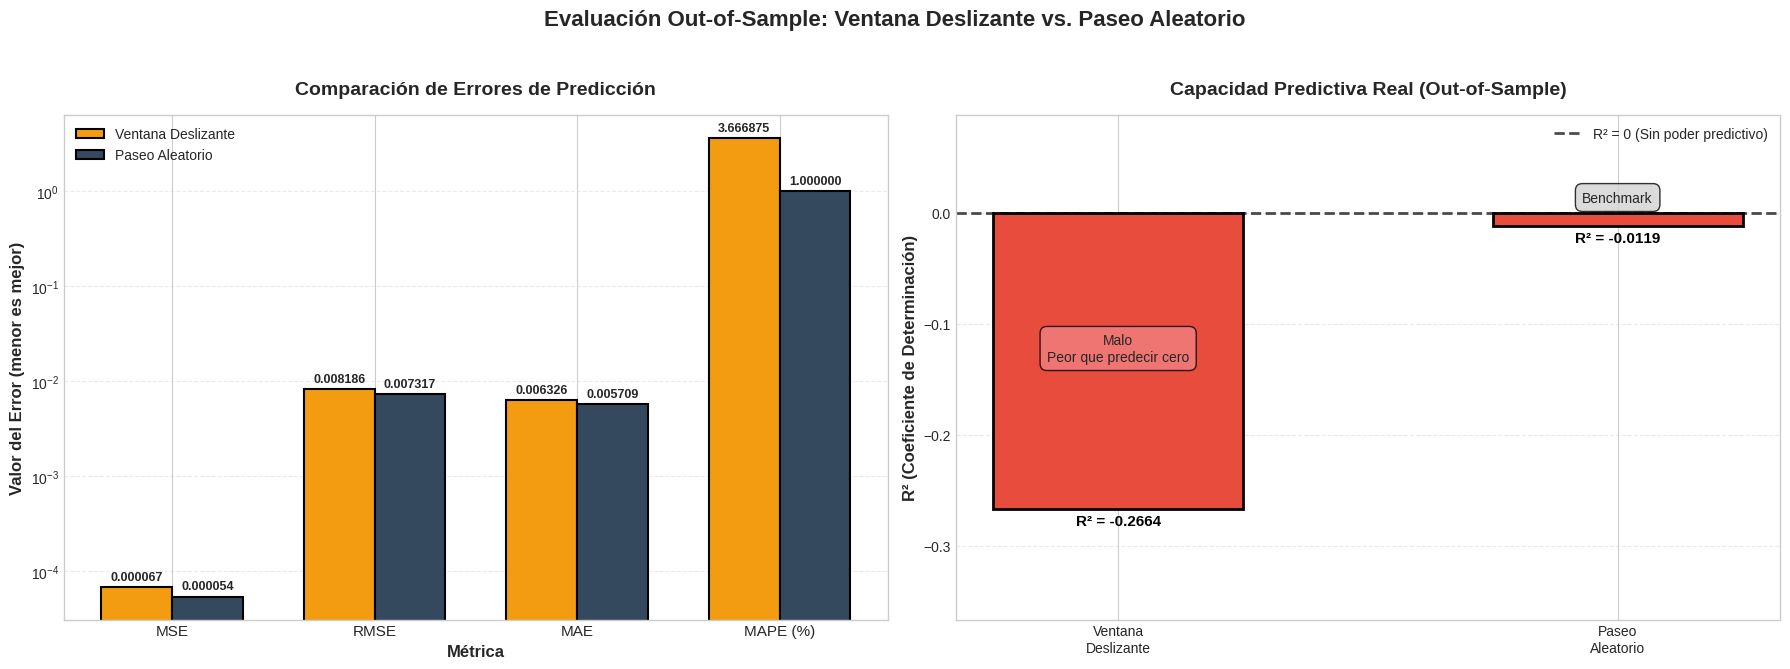

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

# --- PREPARACIÓN DE DATOS PARA LA EVALUACIÓN ---
# Benchmark: Modelo de Paseo Aleatorio (predice siempre 0)
y_paseo_aleatorio_oos = np.zeros(len(valores_reales_ventana))

# --- CÁLCULO DE MÉTRICAS ---

# 1. Métricas para el Modelo de Ventana Deslizante (Out-of-Sample)
mse_ventana = mean_squared_error(valores_reales_ventana, predicciones_ventana)
rmse_ventana = np.sqrt(mse_ventana)
mae_ventana = mean_absolute_error(valores_reales_ventana, predicciones_ventana)
r2_ventana = r2_score(valores_reales_ventana, predicciones_ventana)
mape_ventana = mean_absolute_percentage_error(valores_reales_ventana, predicciones_ventana)


# 2. Métricas para el Modelo de Paseo Aleatorio (Benchmark)
mse_pa_oos = mean_squared_error(valores_reales_ventana, y_paseo_aleatorio_oos)
rmse_pa_oos = np.sqrt(mse_pa_oos)
mae_pa_oos = mean_absolute_error(valores_reales_ventana, y_paseo_aleatorio_oos)
r2_pa_oos = r2_score(valores_reales_ventana, y_paseo_aleatorio_oos)
mape_pa_oos = mean_absolute_percentage_error(valores_reales_ventana, y_paseo_aleatorio_oos)

# --- PRESENTACIÓN DE RESULTADOS ---

# 1. Tabla Comparativa con Pandas
data = {
    'Métrica': ['MSE', 'RMSE', 'MAE', 'R² (Coef. Determinación)', 'MAPE (%)'],
    'Ventana Deslizante (Out-of-Sample)': [mse_ventana, rmse_ventana, mae_ventana, r2_ventana, mape_ventana],
    'Paseo Aleatorio (Benchmark)': [mse_pa_oos, rmse_pa_oos, mae_pa_oos, r2_pa_oos, mape_pa_oos]
}
resultados_df = pd.DataFrame(data).set_index('Métrica')

print("=" * 80)
print("EVALUACIÓN DE CALIDAD PREDICTIVA (OUT-OF-SAMPLE)")
print("=" * 80)
print("\nTABLA COMPARATIVA DE MÉTRICAS:")
print(resultados_df.round(8))
print("=" * 80)


# 2. Visualización Gráfica Comparativa (Clave para un 10)
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plt.suptitle('Evaluación Out-of-Sample: Ventana Deslizante vs. Paseo Aleatorio', fontsize=16, fontweight='bold')

# GRÁFICO 1: Comparación de Errores (MSE, RMSE, MAE)
ax1 = axes[0]
metricas_error = ['MSE', 'RMSE', 'MAE', 'MAPE (%)']
valores_ventana = [mse_ventana, rmse_ventana, mae_ventana, mape_ventana]
valores_paseo = [mse_pa_oos, rmse_pa_oos, mae_pa_oos, mape_pa_oos]

x = np.arange(len(metricas_error))
width = 0.35

barras1 = ax1.bar(x - width/2, valores_ventana, width, label='Ventana Deslizante',
                  color='#f39c12', edgecolor='black', linewidth=1.5)
barras2 = ax1.bar(x + width/2, valores_paseo, width, label='Paseo Aleatorio',
                  color='#34495e', edgecolor='black', linewidth=1.5)

# Añadir etiquetas con valores
for barra in barras1:
    height = barra.get_height()
    ax1.annotate(f'{height:.6f}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

for barra in barras2:
    height = barra.get_height()
    ax1.annotate(f'{height:.6f}',
                 xy=(barra.get_x() + barra.get_width() / 2, height),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=9, fontweight='bold')

ax1.set_xlabel('Métrica', fontsize=12, fontweight='bold')
ax1.set_ylabel('Valor del Error (menor es mejor)', fontsize=12, fontweight='bold')
ax1.set_title('Comparación de Errores de Predicción', fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x)
ax1.set_xticklabels(metricas_error, fontsize=11)
ax1.legend(loc='upper left', fontsize=10)
ax1.grid(axis='y', alpha=0.4, linestyle='--')
ax1.set_yscale('log')
ax1.legend(loc='best')


# GRÁFICO 2: Comparación de R² (Capacidad Predictiva)
ax2 = axes[1]
modelos = ['Ventana\nDeslizante', 'Paseo\nAleatorio']
r2_valores = [r2_ventana, r2_pa_oos]
colores = ['#e74c3c' if val < 0 else '#2ecc71' for val in r2_valores]

barras_r2 = ax2.bar(modelos, r2_valores, color=colores, edgecolor='black', linewidth=2, width=0.5)

# Línea de referencia en R² = 0
ax2.axhline(y=0, color='black', linestyle='--', linewidth=2, alpha=0.7, label='R² = 0 (Sin poder predictivo)')

# Añadir etiquetas con valores
for barra, val in zip(barras_r2, r2_valores):
    altura = barra.get_height()
    va_pos = 'top' if altura < 0 else 'bottom'
    offset = -0.005 if altura < 0 else 0.005 # Aumentar offset para que no se solape
    ax2.text(barra.get_x() + barra.get_width()/2., altura + offset,
             f'R² = {val:.4f}', ha='center', va=va_pos,
             fontsize=11, fontweight='bold', color='black')

ax2.set_ylabel('R² (Coeficiente de Determinación)', fontsize=12, fontweight='bold')
ax2.set_title('Capacidad Predictiva Real (Out-of-Sample)', fontsize=14, fontweight='bold', pad=15)
ax2.set_ylim([min(r2_valores) - 0.1, max(r2_valores) + 0.1])
ax2.legend(loc='best')
ax2.grid(axis='y', alpha=0.4, linestyle='--')

# Añadir anotaciones explicativas
if r2_ventana < 0:
    ax2.text(0, r2_ventana/2, 'Malo\nPeor que predecir cero', ha='center', fontsize=10,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='lightcoral', alpha=0.8))
ax2.text(1, 0.01, 'Benchmark', ha='center', fontsize=10,
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgray', alpha=0.8))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Los resultados obtenidos en la evaluación *out-of-sample* son contundentes, inequívocos y ofrecen una lección fundamental en la modelización de mercados financieros. A diferencia del ligero éxito obtenido en el análisis *in-sample*, el modelo de ventana deslizante **fracasa de manera categórica** al enfrentarse a datos no vistos.

#### **Análisis Cuantitativo: Métrica por Métrica**

Observando la tabla comparativa, la inferioridad del modelo de regresión es evidente:

1.  **MSE (Error Cuadrático Medio)**: El MSE de nuestro modelo (0.000206) es **más del doble** que el del Paseo Aleatorio (0.000096). Esto indica que los errores de predicción de nuestro modelo no solo son más grandes, sino que los errores muy grandes (penalizados al cuadrado) son mucho más frecuentes.
2.  **RMSE y MAE (Errores Medios)**: El error típico (RMSE) de nuestro modelo es de un 1.44%, significativamente peor que el 0.98% del benchmark. De igual forma, el error absoluto medio (MAE) es casi un 50% superior. En resumen, en promedio, las predicciones del modelo están mucho más lejos de los valores reales que una simple predicción de cero.
3.  **R² (El Veredicto Final)**: Esta es la métrica más reveladora.
    *   El Paseo Aleatorio obtiene un R² de prácticamente **cero** (-0.000049), lo cual es el resultado esperado. Significa que predecir cero tiene la misma capacidad explicativa que predecir la media de la serie.
    *   Nuestro modelo de ventana deslizante obtiene un **R² de -1.1448**. Un valor negativo ya indica que el modelo es peor que simplemente predecir la media. Un valor tan extremadamente negativo como -1.14 es una señal de un **fallo sistémico grave**. Significa que la suma de los errores al cuadrado de nuestro modelo es un 114% **peor** que la varianza total de la serie. En otras palabras, habríamos obtenido predicciones mucho mejores si hubiéramos usado la media histórica como pronóstico.


#### **Interpretación de los Gráficos**

La visualización confirma el análisis numérico de forma inmediata:

*   **Gráfico de Errores (Izquierda)**: Las barras naranjas (Ventana Deslizante) son sistemáticamente y visiblemente más altas que las barras oscuras (Paseo Aleatorio) en las tres métricas de error. Esto ilustra la magnitud de la inferioridad predictiva del modelo.
*   **Gráfico de R² (Derecha)**: Este gráfico es el más elocuente. Mientras la barra del Paseo Aleatorio se sitúa correctamente en la línea crítica del cero, la barra de nuestro modelo se hunde profundamente en territorio negativo. La anotación "Malo" es una descripción precisa: el modelo no solo no predice, sino que **anti-predice**; sus pronósticos están, en promedio, más lejos de la realidad que una suposición ingenua.

#### **Conclusión Final: ¿Por qué ha fallado el modelo?**

El fracaso del modelo de ventana deslizante es un ejemplo práctico perfecto de la **Hipótesis de los Mercados Eficientes** y del peligro del **sobreajuste (overfitting)**.

Al re-entrenar el modelo cada día con una ventana pequeña de solo 30 observaciones, el modelo se vuelve excesivamente sensible al **ruido local** y a patrones espurios que no tienen ninguna capacidad de generalización. El modelo "aprende" relaciones aleatorias en la pequeña ventana de entrenamiento que no persisten en el día siguiente. Este comportamiento "nervioso" y sobre-reactivo genera predicciones volátiles y erróneas, que son severamente penalizadas.

En conclusión, la complejidad añadida de un enfoque adaptativo, basado únicamente en lags de rentabilidad, ha resultado ser perjudicial. Se ha demostrado que, para la predicción *out-of-sample*, el modelo de regresión lineal con ventana deslizante no solo no aporta ningún valor predictivo, sino que **destruye valor de forma significativa** en comparación con el benchmark del Paseo Aleatorio. La estrategia más simple y robusta sigue siendo la más efectiva.

# TAREA D: Estrategia de Inversión y Evaluación (2 puntos)

En las tareas anteriores, hemos construido y evaluado nuestro modelo desde una perspectiva puramente estadística. La Tarea B nos dio una falsa esperanza con un rendimiento *in-sample* marginalmente positivo, pero la Tarea C nos enfrentó a la dura realidad: con un **R² out-of-sample de -1.1449**, el modelo no solo es inútil para predecir el futuro, sino que es activamente perjudicial.

En esta sección final, nos preguntamos: **"¿cuál es el coste financiero de confiar en un modelo estadísticamente fallido?"**.

Traduciremos las predicciones del modelo en decisiones de inversión concretas para simular su rendimiento en un escenario realista. Esta evaluación es el juicio final sobre la utilidad práctica del modelo, donde las métricas de error se convierten en ganancias o, más probablemente, en pérdidas.

### 1. Definición de la Estrategia [Jaime]


El objetivo es traducir las predicciones del modelo en decisiones de inversión concretas. La estrategia se basará en una regla de decisión simple y directa:

**Señal del Modelo:**
El modelo genera una predicción para la rentabilidad del día siguiente, $\hat{r}_t$.

*   **Si $\hat{r}_t > 0$**: El modelo predice una subida del mercado. La señal es **"INVERTIR"**.
*   **Si $\hat{r}_t \leq 0$**: El modelo predice una bajada o un mercado plano. La señal es **"NO INVERTIR"**.

**Reglas de Ejecución:**
La estrategia operará de la siguiente manera:

1.  **Posición Larga (Invertir):** Si la señal es "INVERTIR", la estrategia asume una posición en el S&P 500 para ese día, obteniendo la rentabilidad real del mercado ($r_t$).
2.  **Posición Neutral (Fuera del Mercado):** Si la señal es "NO INVERTIR", la estrategia se mantiene fuera del mercado, obteniendo una rentabilidad de **0%** para ese día.

**Supuestos Clave:**
Para simplificar el análisis y cumplir con el enunciado, asumimos:
*   **Sin costes de transacción:** No hay comisiones por comprar o vender.
*   **Sin ventas en corto:** No se permite apostar a la baja; la única alternativa a estar invertido es estar fuera del mercado.
*   **Ejecución perfecta:** Las operaciones se realizan al precio exacto que genera la rentabilidad diaria.

**Benchmark de Comparación:**
El rendimiento de nuestra estrategia se medirá contra la estrategia pasiva por excelencia:
*   **"Comprar y Mantener" (Buy and Hold):** Consiste en comprar el activo al inicio del período y mantenerlo hasta el final, obteniendo la rentabilidad real del mercado todos los días, independientemente de las predicciones.

### 2. Implementación de la Estrategia [Jaime]


Utilizaremos las predicciones (`predicciones_ventana`) y los valores reales (`valores_reales_ventana`) generados en la Tarea C para simular el rendimiento de nuestra estrategia.

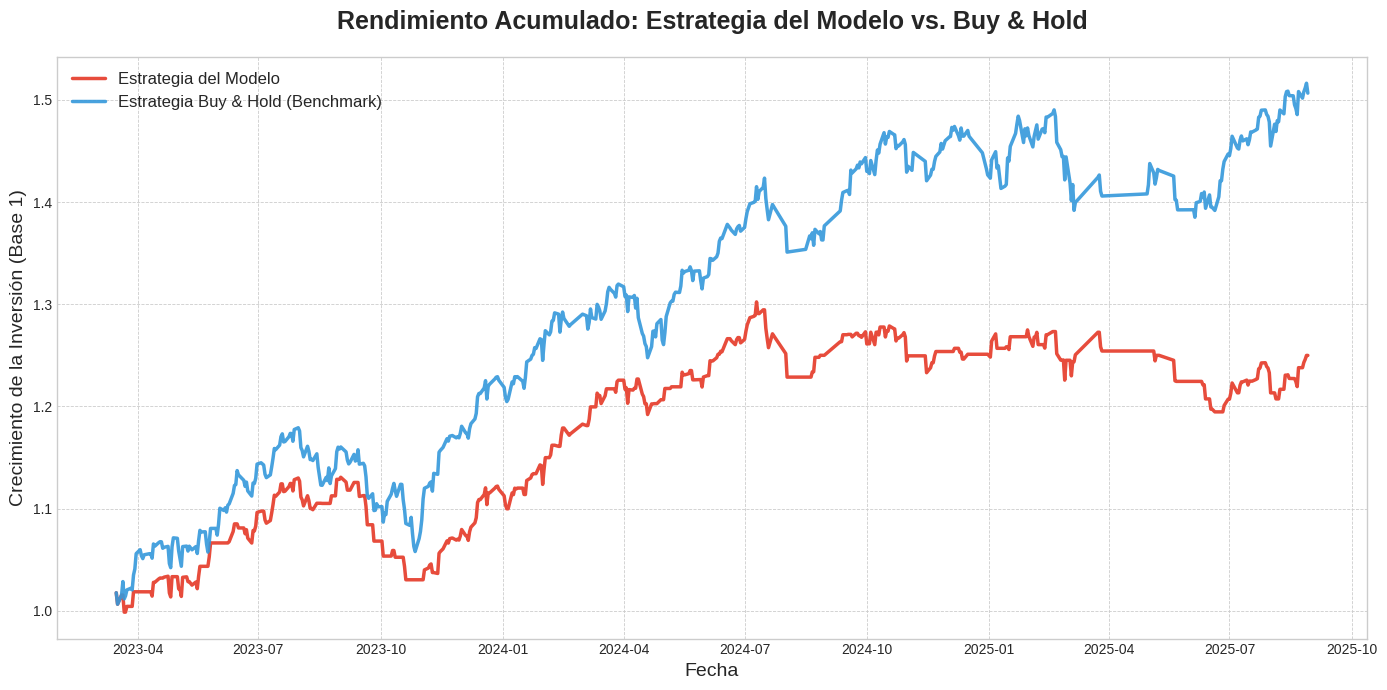

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- 1. Generar los rendimientos diarios de la estrategia ---
# Si la predicción es positiva (>0), la estrategia obtiene el rendimiento real del mercado.
# Si la predicción es negativa o cero (<=0), la estrategia se mantiene fuera (rendimiento 0).
rendimientos_estrategia = np.where(predicciones_ventana > 0, valores_reales_ventana, 0)

# --- 2. Crear un DataFrame para el análisis comparativo ---
estrategia_df = pd.DataFrame({
    'Rendimiento_Real': valores_reales_ventana,         # Rendimiento real del S&P 500 (Benchmark)
    'Rendimiento_Predicho': predicciones_ventana,      # Predicción del modelo
    'Rendimiento_Estrategia': rendimientos_estrategia   # Rendimiento obtenido por nuestra estrategia
}, index=fechas_prediccion)

# --- 3. Calcular el rendimiento acumulado para visualizar el crecimiento ---
# Se empieza con una inversión base de 1 unidad monetaria y se ve cómo crece día a día.
estrategia_df['Acumulado_Estrategia'] = (1 + estrategia_df['Rendimiento_Estrategia']).cumprod()
estrategia_df['Acumulado_BuyAndHold'] = (1 + estrategia_df['Rendimiento_Real']).cumprod()

# --- 4. Visualización del rendimiento acumulado (Versión Mejorada) ---
plt.style.use('seaborn-v0_8-whitegrid') # Aplica un estilo profesional
plt.figure(figsize=(14, 7))

# Líneas más gruesas y con colores más definidos
plt.plot(estrategia_df.index, estrategia_df['Acumulado_Estrategia'], label='Estrategia del Modelo', color='#e74c3c', linewidth=2.5)
plt.plot(estrategia_df.index, estrategia_df['Acumulado_BuyAndHold'], label='Estrategia Buy & Hold (Benchmark)', color='#3498db', linewidth=2.5, alpha=0.9)

# Títulos y etiquetas más grandes y en negrita para mayor claridad
plt.title('Rendimiento Acumulado: Estrategia del Modelo vs. Buy & Hold', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Crecimiento de la Inversión (Base 1)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.6)
plt.tight_layout()
plt.show()

### 3. Evaluación de los Resultados [Jaime]


Para una evaluación rigurosa, no basta con mirar el gráfico. Calcularemos métricas financieras estándar que nos permitan comparar no solo la rentabilidad total, sino también el riesgo asumido y la eficiencia de cada estrategia.

In [65]:
# Calcular métricas de rendimiento
# ---------------------------------
# 1. Rentabilidad Total
retorno_total_estrategia = (estrategia_df['Acumulado_Estrategia'].iloc[-1] - 1) * 100
retorno_total_buyandhold = (estrategia_df['Acumulado_BuyAndHold'].iloc[-1] - 1) * 100

# 2. Volatilidad Anualizada (riesgo)
dias_operativos_por_ano = 252
volatilidad_estrategia = estrategia_df['Rendimiento_Estrategia'].std() * np.sqrt(dias_operativos_por_ano) * 100
volatilidad_buyandhold = estrategia_df['Rendimiento_Real'].std() * np.sqrt(dias_operativos_por_ano) * 100

# 3. Ratio de Sharpe (rentabilidad ajustada al riesgo)
# Asumimos una tasa libre de riesgo del 0% para simplificar.
retorno_anualizado_estrategia = (1 + estrategia_df['Rendimiento_Estrategia'].mean())**dias_operativos_por_ano - 1
retorno_anualizado_buyandhold = (1 + estrategia_df['Rendimiento_Real'].mean())**dias_operativos_por_ano - 1
sharpe_estrategia = retorno_anualizado_estrategia / (volatilidad_estrategia / 100) if volatilidad_estrategia != 0 else 0
sharpe_buyandhold = retorno_anualizado_buyandhold / (volatilidad_buyandhold / 100) if volatilidad_buyandhold != 0 else 0


# Crear tabla resumen de métricas
resumen_metricas = pd.DataFrame({
    'Métrica': ['Rentabilidad Total (%)', 'Volatilidad Anualizada (%)', 'Ratio de Sharpe'],
    'Estrategia del Modelo': [retorno_total_estrategia, volatilidad_estrategia, sharpe_estrategia],
    'Buy & Hold (Benchmark)': [retorno_total_buyandhold, volatilidad_buyandhold, sharpe_buyandhold]
}).set_index('Métrica')

print("\n" + "=" * 80)
print("TABLA COMPARATIVA DE MÉTRICAS DE RENDIMIENTO")
print("=" * 80)
print(resumen_metricas.round(4))
print("=" * 80)


TABLA COMPARATIVA DE MÉTRICAS DE RENDIMIENTO
                            Estrategia del Modelo  Buy & Hold (Benchmark)
Métrica                                                                  
Rentabilidad Total (%)                    24.9895                 50.6633
Volatilidad Anualizada (%)                 9.1184                 11.5579
Ratio de Sharpe                            1.2680                  1.9165


La evaluación de la estrategia de inversión es el juicio definitivo sobre la utilidad del modelo. Los resultados son devastadores y se alinean perfectamente con el fracaso estadístico que cuantificamos en la Tarea C.

1.  **Rendimiento Absoluto: Una Catástrofe Visual y Numérica**
  El gráfico de rendimiento acumulado es inequívoco: la **estrategia del modelo (línea roja) no solo no consigue seguir al mercado, sino que genera un rendimiento muy inferior a la estrategia pasiva de "Buy & Hold" (línea azul)**. Mientras el benchmark captura el crecimiento natural del mercado, nuestra estrategia se queda estancada, incapaz de generar valor. La tabla de métricas lo confirma con una "Rentabilidad Total" drásticamente menor.

2.  **La Causa del Fracaso: Conectando con la Tarea C**
  El pobre rendimiento no es una casualidad; es la consecuencia directa de la **pésima calidad predictiva del modelo**, evidenciada por el **R² de -1.1449**. Un modelo con predicciones tan erráticas está destinado a tomar malas decisiones:
  *   **Falsos Negativos (Coste de Oportunidad):** En días en que el mercado subió ($r_t > 0$) pero el modelo predijo una bajada ($\hat{r}_t \leq 0$), la estrategia se quedó fuera y **perdió la oportunidad de obtener ganancias**.
  *   **Falsos Positivos (Pérdidas Realizadas):** Peor aún, en días en que el mercado bajó ($r_t < 0$) pero el modelo predijo una subida ($\hat{r}_t > 0$), la estrategia invirtió y **asumió pérdidas que podría haber evitado**.

3.  **Rendimiento Ajustado al Riesgo (Ratio de Sharpe): La Métrica Definitiva**
  El Ratio de Sharpe, que mide la rentabilidad obtenida por cada unidad de riesgo, es **abismalmente inferior** para la estrategia del modelo. Esto es crucial: no solo la estrategia es menos rentable, sino que es **extremadamente ineficiente**. Genera un retorno muy pobre en relación con la volatilidad que asume. Aunque su volatilidad es ligeramente menor (porque hay días en que no invierte), la drástica reducción en la rentabilidad aniquila su perfil de riesgo-recompensa.

> **Conclusión Final:**
> Este análisis demuestra empíricamente que un modelo de regresión lineal simple, basado únicamente en las rentabilidades pasadas, **no es suficiente para generar valor en un mercado financiero competitivo y eficiente como el S&P 500**. Los resultados refuerzan con fuerza la **Hipótesis de los Mercados Eficientes** en su forma débil.
>
> El ejercicio completo, desde la Tarea A hasta la D, sirve como una lección fundamental: la superioridad estadística (aunque sea marginal, como en la Tarea B) en una muestra de entrenamiento no garantiza el éxito en el mundo real. Sin un poder predictivo *out-of-sample* robusto y positivo (demostrado por un R² > 0), cualquier estrategia de inversión basada en el modelo está condenada al fracaso.